# SARIMA Modeling

## Kevin Sheppard
### Advanced Financial Econometrics: Forecasting

### Background

Material available on [my site](https://www.kevinsheppard.com/teaching/mfe/advanced-financial-econometrics-forecasting/).

More detail in [pre-recorded lectures](https://www.youtube.com/playlist?list=PLVR_rJLcetzmES8tqjgqlQw1Vx2IKMVot).

### Viewing as a Presentation

This notebook has been written with RISE in mind. To view it as a presentation, install RISE using pip install RISE and then press ALT + R to enter slides model.


### Updating statsmodels

Some of the code in this notebook requires a recent version statsmodels (as of May 2020). If you already have statsmodels 0.12.0 or later, you can ignore this step.

You can install the development version of statsmodels using the command

```
pip install statsmodels --upgrade --pre --find-links https://7933911d6844c6c53a7d-47bd50c35cd79bd838daf386af554a83.ssl.cf2.rackcdn.com/ 
```

This is a repository where pre-release versions are stored.

# Imports and Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from scipy import stats
import seaborn as sns
sns.set_style("darkgrid")
# These values are optimized for full-screen on a high-resolution monitor
plt.rc("figure", figsize=(40,16))
plt.rc("font", size=28)
plt.rc("lines", linewidth=4)

# Load some data

We will use the 432-observation M4 data to explore ES.

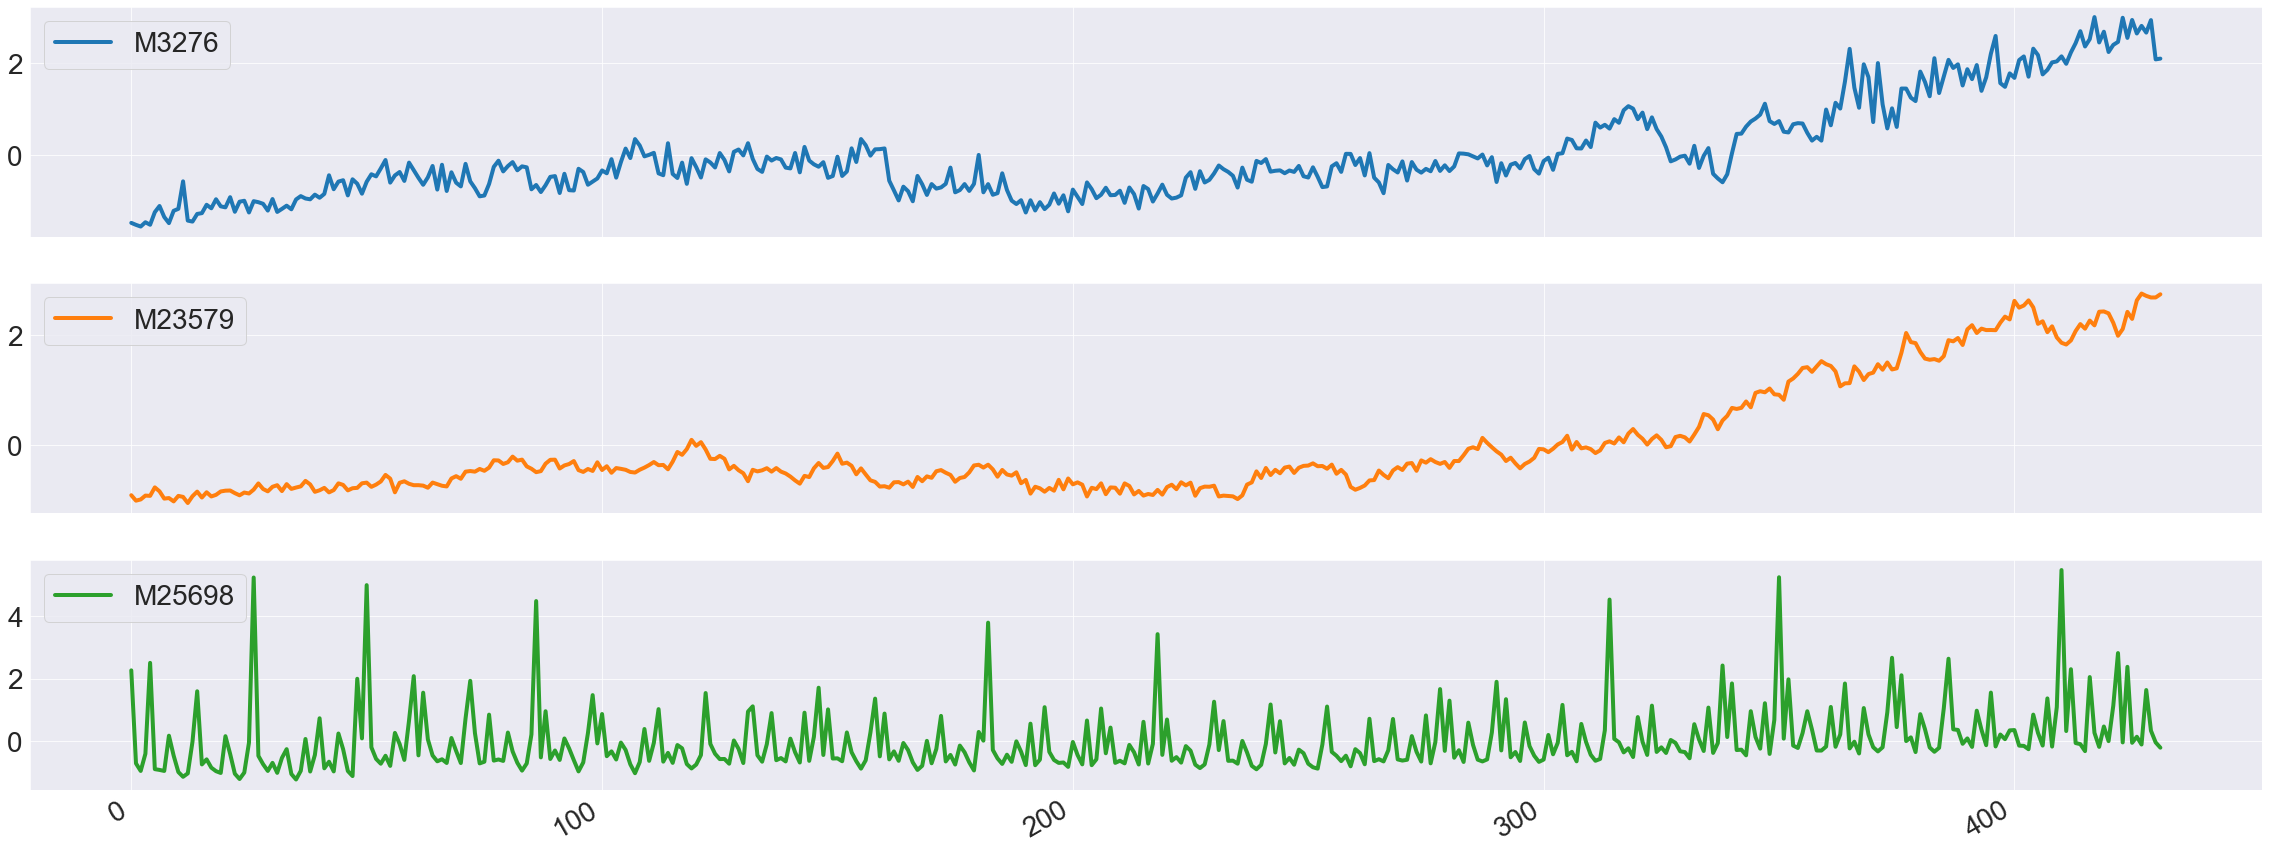

In [2]:
df: pd.DataFrame = pd.read_hdf("./monthly-data.h5", f"nobs_432")
data = df[["M3276","M23579","M25698"]]
data.index = np.arange(data.shape[0])
std_data = (data - data.mean()) / data.std()
plts = std_data.plot(subplots=True)

# Non-seasonal modeling

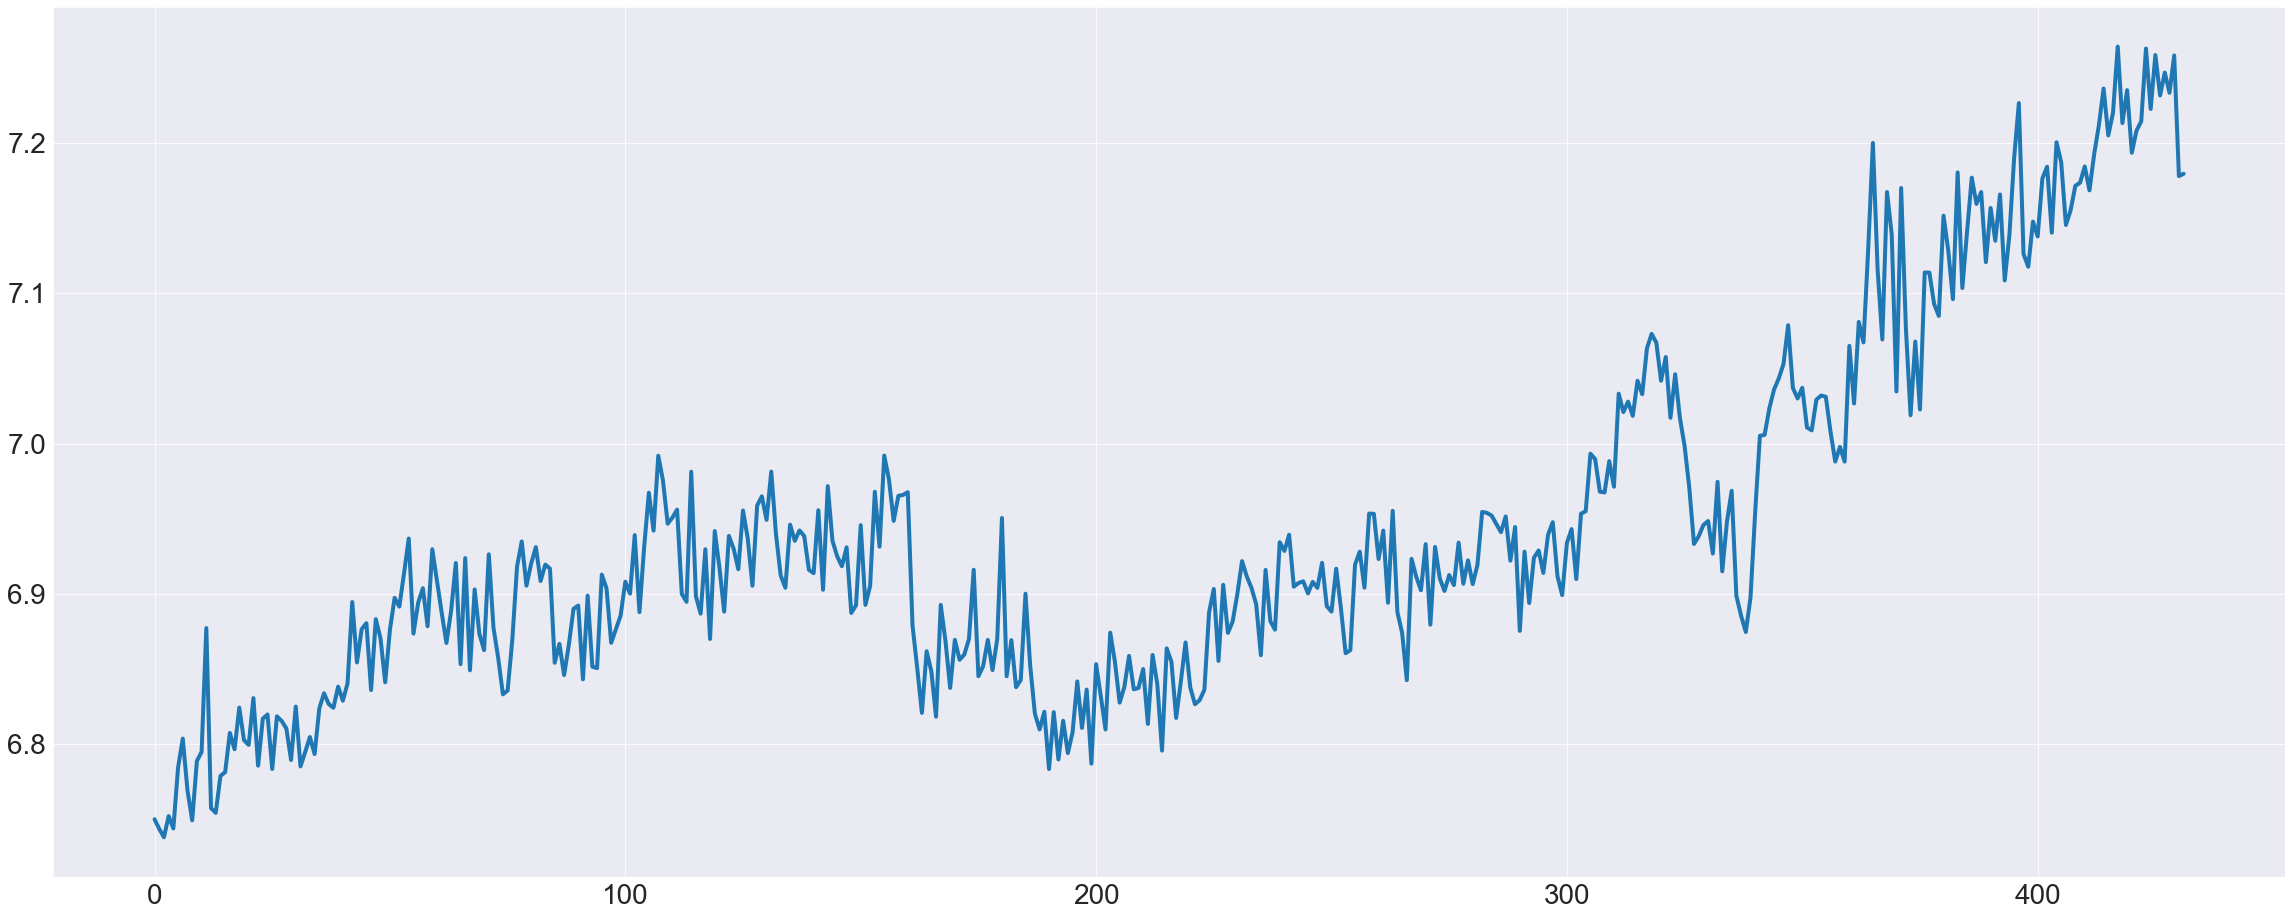

In [3]:
y = np.log(data["M3276"])
y.plot()

In [4]:
res = SARIMAX(y, order=(1,0,0), trend="ct").fit(maxiter=250)
res.summary()

c:\git\statsmodels\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  M3276   No. Observations:                  432
Model:               SARIMAX(1, 0, 0)   Log Likelihood                 828.258
Date:                Wed, 06 May 2020   AIC                          -1648.515
Time:                        18:57:52   BIC                          -1632.242
Sample:                             0   HQIC                         -1642.091
                                - 432                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.8916      0.166      5.376      0.000       0.567       1.217
drift       9.836e-05    2.3e-05      4.271      0.000    5.32e-05       0.000
ar.L1          0.8686      0.024     35.550      0.000       0.821       0.917
sigma2         0.0013   8.38e-05     15.075      0.000       0.001       0.001
===================================================================================
Ljung-Box (Q):                      468.41   Jarque-Bera (JB):                 2.18
Prob(Q):                              0.00   Prob(JB):                         0.34
Heteroskedasticity (H):               1.31   Skew:                             0.14
Prob(H) (two-sided):                  0.11   Kurtosis:                         3.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [5]:
y = np.log(data["M3276"])
res = SARIMAX(y, order=(1,0,1), trend="ct").fit(maxiter=250)
res.summary()

c:\git\statsmodels\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  M3276   No. Observations:                  432
Model:               SARIMAX(1, 0, 1)   Log Likelihood                 871.818
Date:                Wed, 06 May 2020   AIC                          -1733.637
Time:                        18:57:52   BIC                          -1713.295
Sample:                             0   HQIC                         -1725.606
                                - 432                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3852      0.088      4.385      0.000       0.213       0.557
drift       4.312e-05   1.11e-05      3.901      0.000    2.15e-05    6.48e-05
ar.L1          0.9433      0.013     72.878      0.000       0.918       0.969
ma.L1         -0.5243      0.040    -13.111      0.000      -0.603      -0.446
sigma2         0.0010    6.6e-05     15.096      0.000       0.001       0.001
===================================================================================
Ljung-Box (Q):                      242.60   Jarque-Bera (JB):                 1.35
Prob(Q):                              0.00   Prob(JB):                         0.51
Heteroskedasticity (H):               1.49   Skew:                             0.14
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [6]:
res = SARIMAX(y, order=(1, 1, 1), trend="c").fit(maxiter=250)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  M3276   No. Observations:                  432
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 873.200
Date:                Wed, 06 May 2020   AIC                          -1738.401
Time:                        18:57:53   BIC                          -1722.136
Sample:                             0   HQIC                         -1731.979
                                - 432                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0011      0.001      1.486      0.137      -0.000       0.003
ar.L1         -0.0528      0.077     -0.684      0.494      -0.204       0.098
ma.L1         -0.5192      0.067     -7.789      0.000      -0.650      -0.389
sigma2         0.0010   6.69e-05     15.201      0.000       0.001       0.001
===================================================================================
Ljung-Box (Q):                      233.02   Jarque-Bera (JB):                 0.81
Prob(Q):                              0.00   Prob(JB):                         0.67
Heteroskedasticity (H):               1.49   Skew:                             0.05
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [7]:
res = SARIMAX(y, order=(0, 1, 1), trend="c").fit(maxiter=250)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  M3276   No. Observations:                  432
Model:               SARIMAX(0, 1, 1)   Log Likelihood                 873.027
Date:                Wed, 06 May 2020   AIC                          -1740.053
Time:                        18:57:53   BIC                          -1727.855
Sample:                             0   HQIC                         -1735.237
                                - 432                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0010      0.001      1.539      0.124      -0.000       0.002
ma.L1         -0.5573      0.033    -16.824      0.000      -0.622      -0.492
sigma2         0.0010   6.69e-05     15.221      0.000       0.001       0.001
===================================================================================
Ljung-Box (Q):                      236.92   Jarque-Bera (JB):                 0.71
Prob(Q):                              0.00   Prob(JB):                         0.70
Heteroskedasticity (H):               1.49   Skew:                             0.05
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [8]:
res = SARIMAX(y, order=(0, 1, 1), trend="n").fit(maxiter=250)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  M3276   No. Observations:                  432
Model:               SARIMAX(0, 1, 1)   Log Likelihood                 871.865
Date:                Wed, 06 May 2020   AIC                          -1739.729
Time:                        18:57:53   BIC                          -1731.597
Sample:                             0   HQIC                         -1736.518
                                - 432                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5494      0.034    -16.363      0.000      -0.615      -0.484
sigma2         0.0010   6.71e-05     15.260      0.000       0.001       0.001
===================================================================================
Ljung-Box (Q):                      240.24   Jarque-Bera (JB):                 0.68
Prob(Q):                              0.00   Prob(JB):                         0.71
Heteroskedasticity (H):               1.48   Skew:                             0.05
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Seasonal

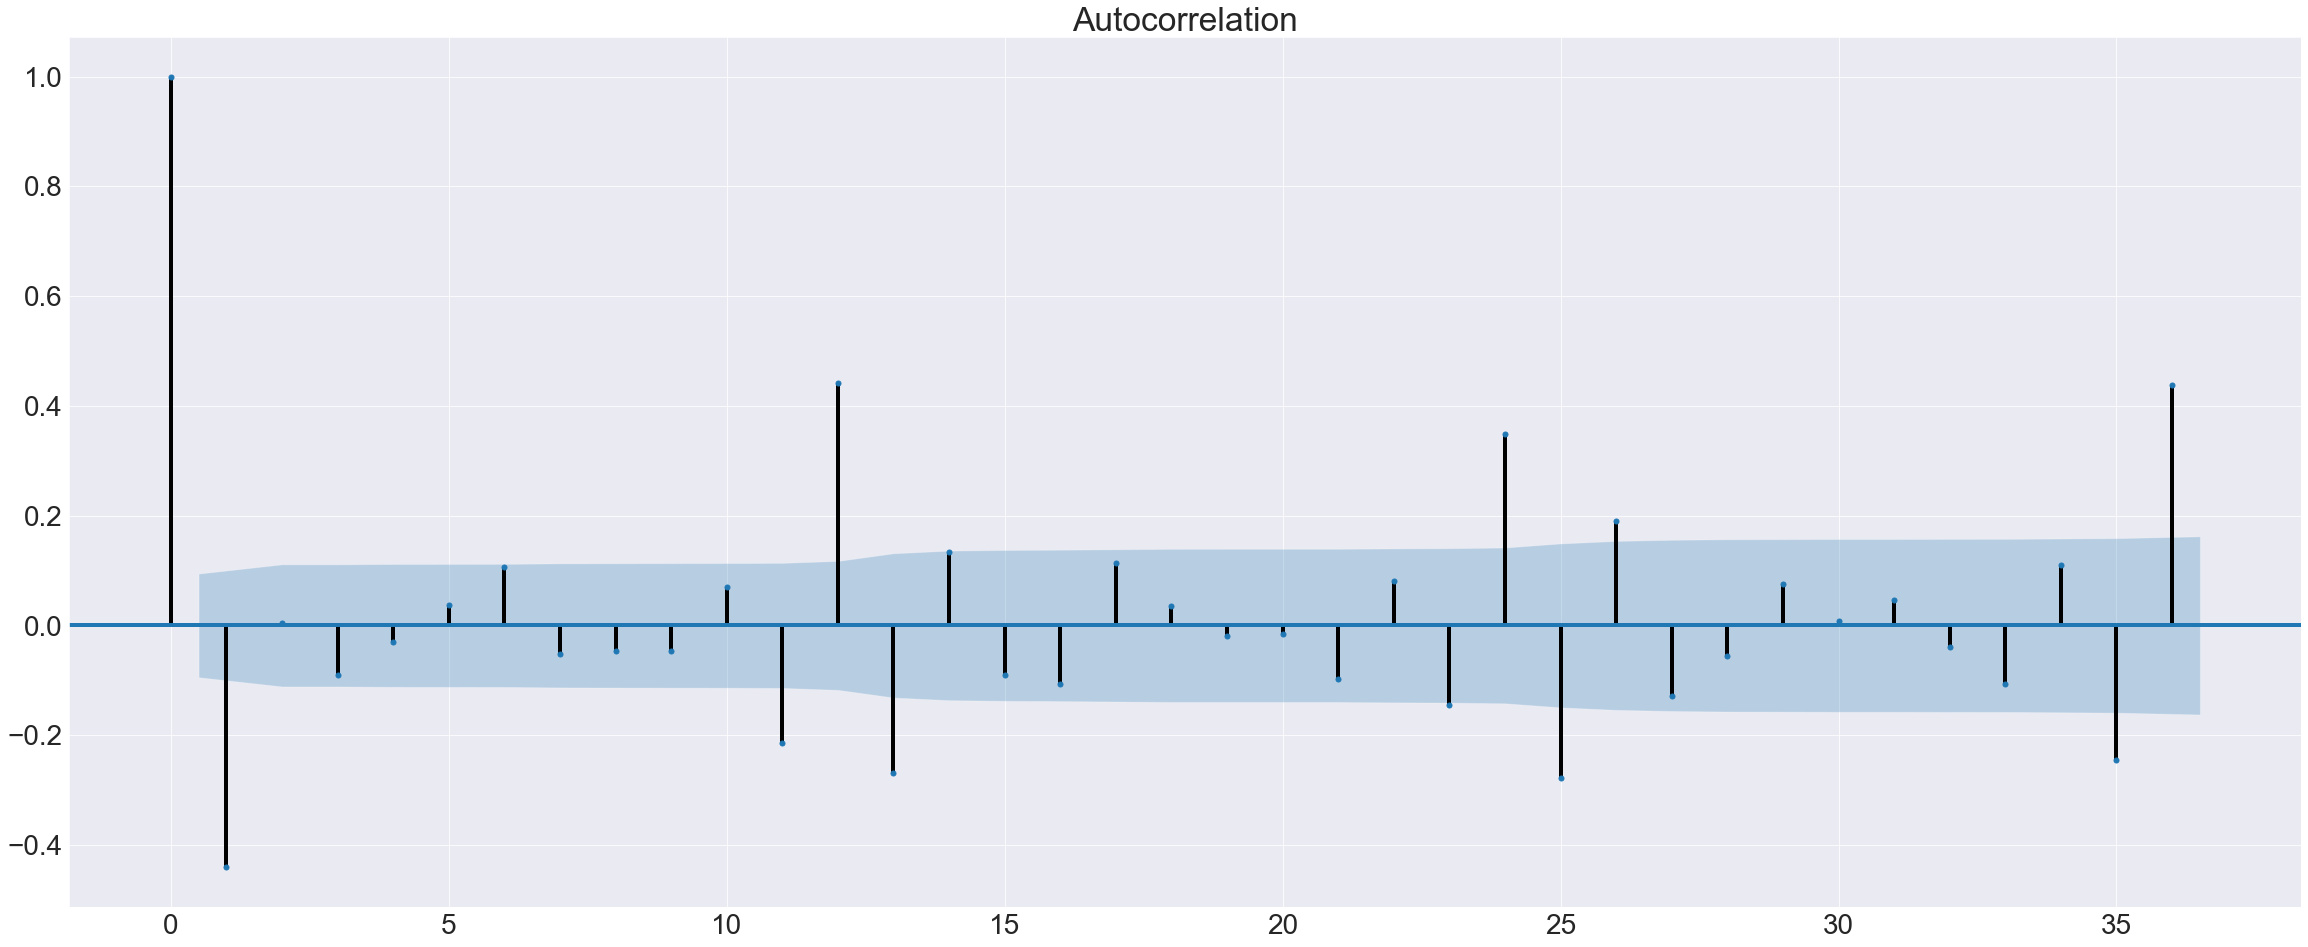

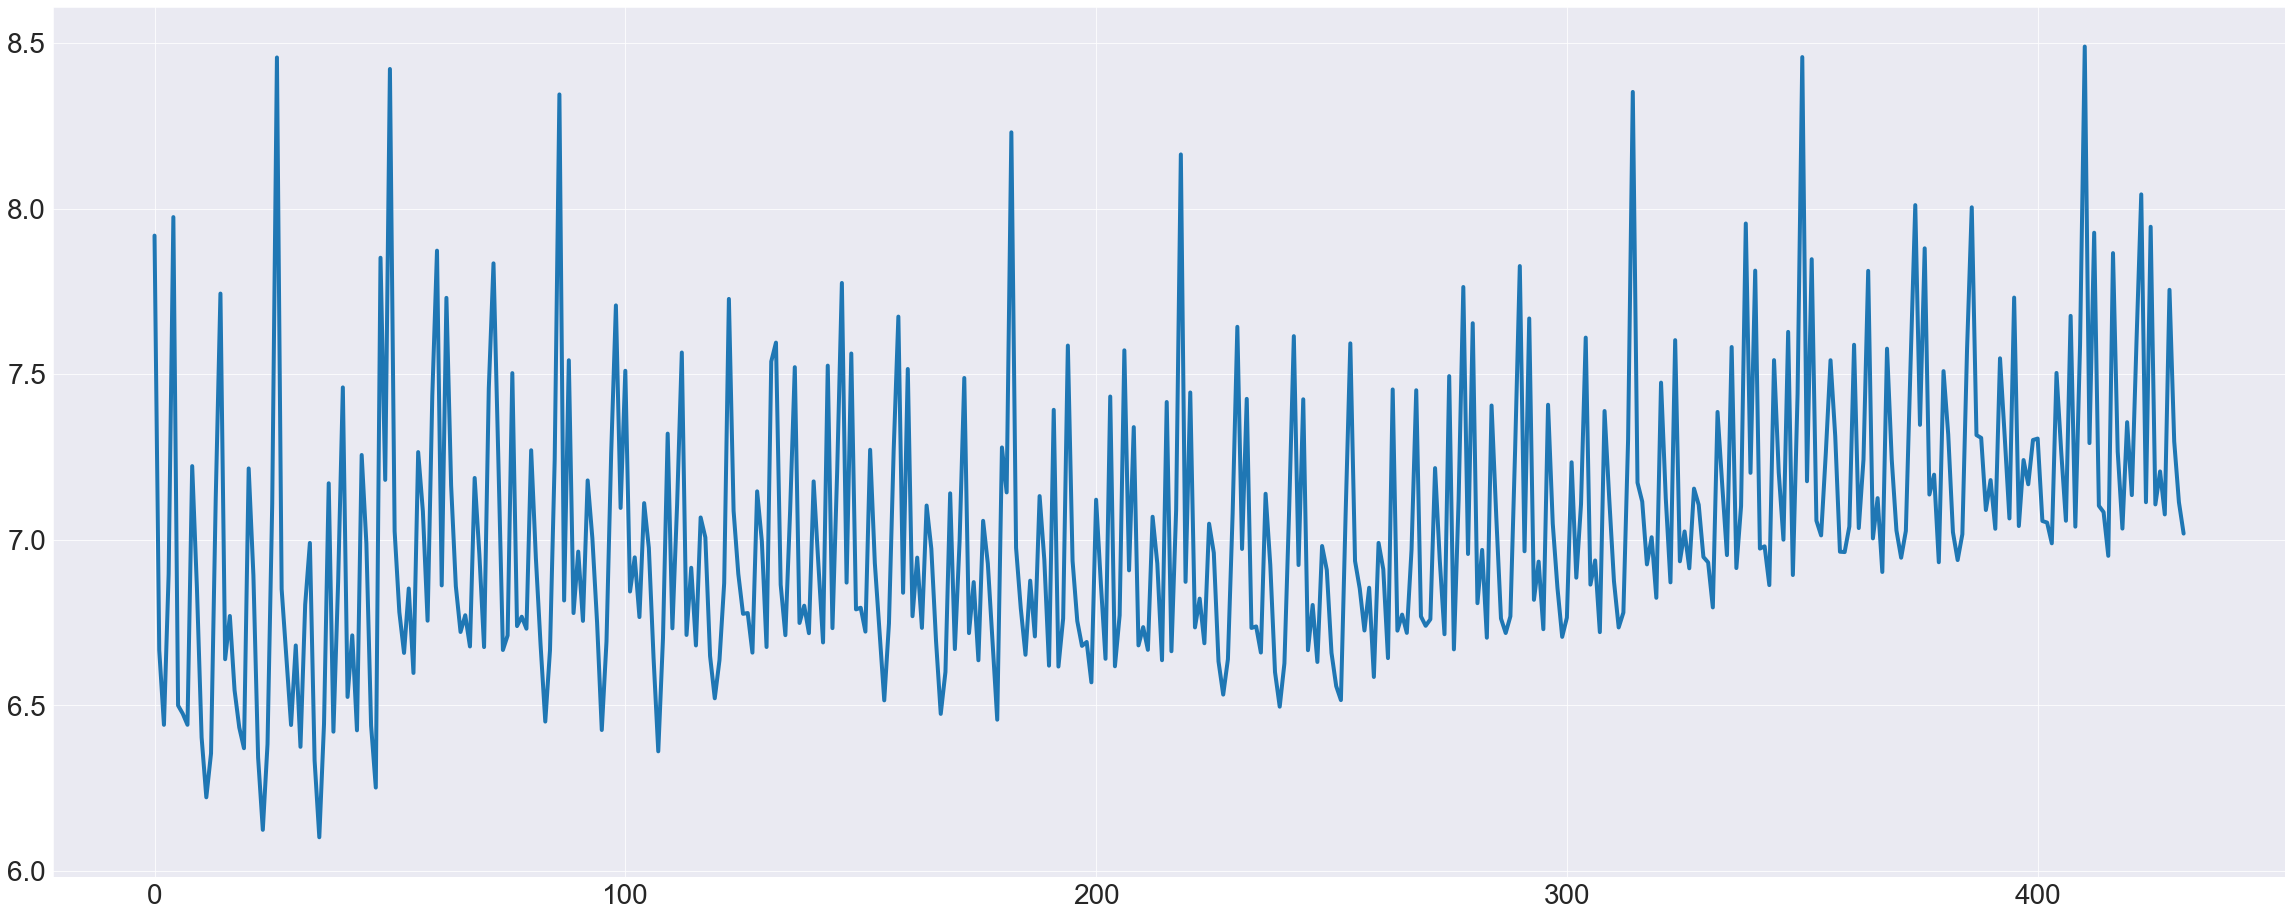

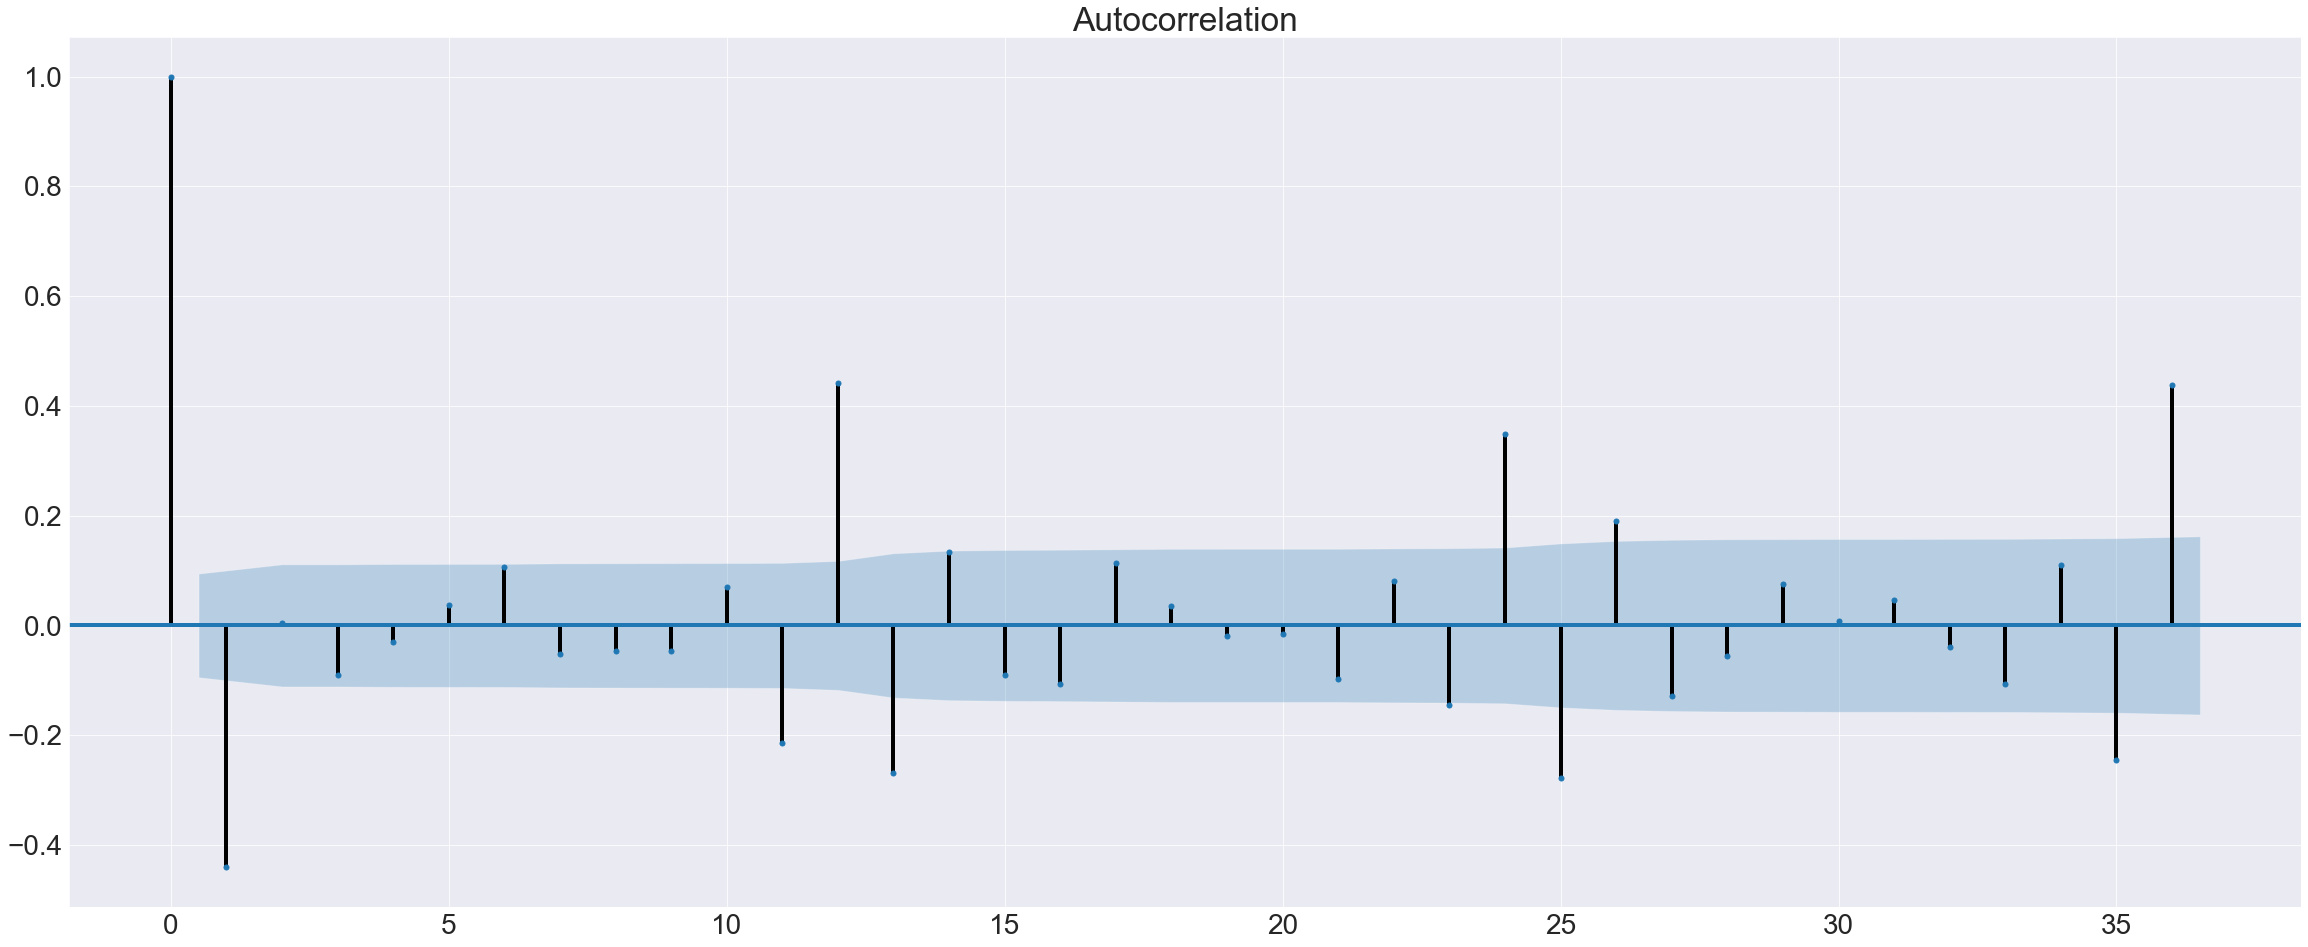

In [9]:
y = np.log(data["M25698"])
y.plot()
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
plot_acf(y.diff().dropna(), lags=36)

In [10]:
seasonals = np.arange(y.shape[0] + 24)
seasonals = seasonals - 12 * (seasonals // 12)
seasonals

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  0,  1,  2,  3,  4,
        5,  6,  7,  8,  9, 10, 11,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
       10, 11,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  0,  1,  2,
        3,  4,  5,  6,  7,  8,  9, 10, 11,  0,  1,  2,  3,  4,  5,  6,  7,
        8,  9, 10, 11,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  0,
        1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  0,  1,  2,  3,  4,  5,
        6,  7,  8,  9, 10, 11,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
       11,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  0,  1,  2,  3,
        4,  5,  6,  7,  8,  9, 10, 11,  0,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  0,  1,
        2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  0,  1,  2,  3,  4,  5,  6,
        7,  8,  9, 10, 11,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
        0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  0,  1,  2,  3,  4,
        5,  6,  7,  8,  9

In [11]:
from pandas import get_dummies
dummies = get_dummies(pd.Series(seasonals, dtype="category"), drop_first=True)
dummies.columns = [f"s{i}" for i in range(2, 13)]
dummies.head(14)

,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12
0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,0
6,0,0,0,0,0,1,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,0
8,0,0,0,0,0,0,0,1,0,0,0
9,0,0,0,0,0,0,0,0,1,0,0


In [12]:
res = SARIMAX(y, exog=dummies.iloc[:y.shape[0]], order=(1, 0 , 0), trend="c").fit(maxiter=250)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 M25698   No. Observations:                  432
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -107.377
Date:                Wed, 06 May 2020   AIC                            242.754
Time:                        18:57:56   BIC                            299.712
Sample:                             0   HQIC                           265.240
                                - 432                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.7890      0.303     15.810      0.000       4.195       5.383
s2             0.2540      0.070      3.623      0.000       0.117       0.391
s3             0.6782      0.056     12.038      0.000       0.568       0.789
s4             0.1128      0.082      1.370      0.171      -0.049       0.274
s5             0.4786      0.068      7.014      0.000       0.345       0.612
s6            -0.1126      0.114     -0.983      0.325      -0.337       0.112
s7            -0.0340      0.137     -0.248      0.804      -0.302       0.234
s8            -0.1812      0.126     -1.443      0.149      -0.427       0.065
s9             0.3647      0.102      3.567      0.000       0.164       0.565
s10            0.1335      0.176      0.757      0.449      -0.212       0.479
s11           -0.1624      0.112     -1.452      0.146      -0.382       0.057
s12            0.0478      0.056      0.853      0.394      -0.062       0.158
ar.L1          0.3072      0.044      7.059      0.000       0.222       0.392
sigma2         0.0962      0.005     17.548      0.000       0.085       0.107
===================================================================================
Ljung-Box (Q):                      238.42   Jarque-Bera (JB):                47.54
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.53   Skew:                            -0.10
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [14]:
res.forecast(24, exog=dummies.iloc[y.shape[0]:])

432    6.930206
433    7.171729
434    7.591999
435    7.025464
436    7.390912
437    6.799608
438    6.878196
439    6.730898
440    7.276875
441    7.045619
442    6.749763
443    6.959958
444    6.912142
445    7.166180
446    7.590295
447    7.024941
448    7.390752
449    6.799559
450    6.878181
451    6.730893
452    7.276874
453    7.045618
454    6.749763
455    6.959958
dtype: float64

In [ ]:
res = SARIMAX(y,order=(0,0,0), seasonal_order=(0, 1,0, 12), trend="c").fit()
res.summary()

In [ ]:
res.forecast(24)